Welcome to this interactive python session. This should be considered supplementary content to the chapter. We would strongly advise you to read the chapter before trying the hands-on sessions.

This session will talk about cross-correlation.

We encourage you to play around with the numbers as much as possible to get a good feel for the topic. Come to your own conclusions and let us know if you observe some interesting behaviour!



In [0]:
import numpy as np
import scipy.signal as sc
from tabulate import tabulate
from astropy.convolution import convolve
import matplotlib.pyplot as plt


For the sake of intuition, lets take a two very basic signals: *base* and *kernel*. We will first calculate the cross-correlation of kernel with base and then of base with kernel. Finally we will compare these cross-correlations.

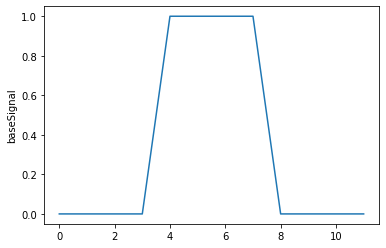

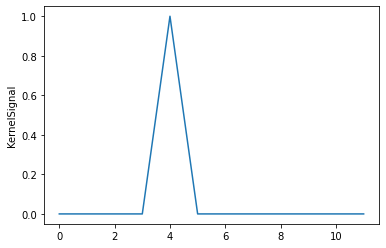

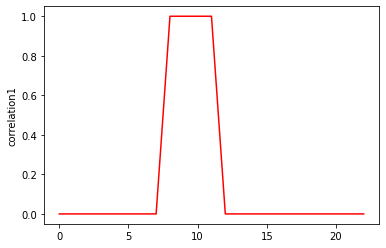

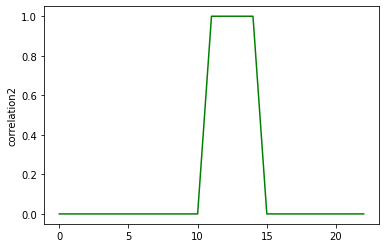

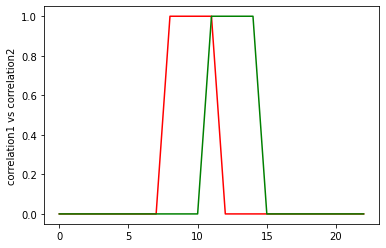

In [0]:
baseSignal=[0,0,0,0,1, 1, 1, 1,0,0,0,0]
plt.plot(baseSignal)
plt.ylabel('baseSignal')
plt.show()
KernelSignal=[0,0,0,0,1,0,0,0,0,0,0,0]
plt.plot(KernelSignal)
plt.ylabel('KernelSignal')
plt.show()
correlation1=sc.correlate(KernelSignal,baseSignal)
correlation2=sc.correlate(baseSignal,KernelSignal)
plt.plot(correlation1,'r')
plt.ylabel('correlation1')
plt.show()
plt.plot(correlation2,'g')
plt.ylabel('correlation2')
plt.show()
plt.plot(correlation1,'r')
plt.plot(correlation2,'g')
plt.ylabel('correlation1 vs correlation2')
plt.show()

Lets now take a more complex 2-D example. First we will solve this using the scipy API and then try to work out the calculation on our own.


In [0]:
base = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print("Say our image is:")
print(tabulate(base, tablefmt="fancy_grid"))
print("And, the kernel is:")
print(tabulate(kernel, tablefmt="fancy_grid"))

Say our image is:
╒═══╤═══╤═══╕
│ 1 │ 2 │ 3 │
├───┼───┼───┤
│ 4 │ 5 │ 6 │
├───┼───┼───┤
│ 7 │ 8 │ 9 │
╘═══╧═══╧═══╛
And, the kernel is:
╒════╤════╤════╕
│ -1 │ -2 │ -1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│  1 │  2 │  1 │
╘════╧════╧════╛


In [0]:
correlation=sc.correlate2d(base,kernel)
print("output of cross correlation:")
print(tabulate(correlation, tablefmt="fancy_grid"))

output of cross correlation:
╒════╤═════╤═════╤═════╤════╕
│  1 │   4 │   8 │   8 │  3 │
├────┼─────┼─────┼─────┼────┤
│  4 │  13 │  20 │  17 │  6 │
├────┼─────┼─────┼─────┼────┤
│  6 │  18 │  24 │  18 │  6 │
├────┼─────┼─────┼─────┼────┤
│ -4 │ -13 │ -20 │ -17 │ -6 │
├────┼─────┼─────┼─────┼────┤
│ -7 │ -22 │ -32 │ -26 │ -9 │
╘════╧═════╧═════╧═════╧════╛


Manually computing cross correlation.


In [0]:
zeroPad=np.pad(base,2,mode='constant')
print("zero padded image:")
print(tabulate(zeroPad, tablefmt="fancy_grid"))
print("kernel:")
print(tabulate(kernel, tablefmt="fancy_grid"))

zero padded image:
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 2 │ 3 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 4 │ 5 │ 6 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 7 │ 8 │ 9 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╛
kernel:
╒════╤════╤════╕
│ -1 │ -2 │ -1 │
├────┼────┼────┤
│  0 │  0 │  0 │
├────┼────┼────┤
│  1 │  2 │  1 │
╘════╧════╧════╛


Let's use the following formula to cross check the values we got earlier using scipy.

$G[i,j]=\sum_{u=-k}^{k}\sum_{v=-k}^{k}H[u,v]F[i+u,j+v]$

In this zero padded base image, we can calculate the convolution output as follows:



```
top left 3x3 square:
-1x0+-2x0+-1x0+0x0+0x0+0x0+(1x0)+(2x0)+(1x1) = 1

top left 3x3 square shifted one unit to the right:
-1x0+-2x0+1x0+0x0+0x0+0x0+(1x0)+(2x1)+(1x2) = 4

top left 3x3 square shifted 2 units to the right:
1x0+-2x0+1x0+0x0+0x0+0x0+(1x1)+(2x2)+(1x3) = 8

and so on..

```



